In [1]:
from ultralytics import YOLO
import cv2
from pydantic import BaseModel
from matplotlib import pyplot as plt

In [2]:

# Define the keypoint indices
class GetKeypoint(BaseModel):
    NOSE: int = 0
    LEFT_EYE: int = 1
    RIGHT_EYE: int = 2
    LEFT_EAR: int = 3
    RIGHT_EAR: int = 4
    LEFT_SHOULDER: int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW: int = 7
    RIGHT_ELBOW: int = 8
    LEFT_WRIST: int = 9
    RIGHT_WRIST: int = 10
    LEFT_HIP: int = 11
    RIGHT_HIP: int = 12
    LEFT_KNEE: int = 13
    RIGHT_KNEE: int = 14
    LEFT_ANKLE: int = 15
    RIGHT_ANKLE: int = 16

# Load YOLOv8 Pose model
model = YOLO(r"D:\ML_2024\pretrain_model\yolov8m-pose.pt")

# Read the image
image_path = r"D:\ML_2024\HW2\raisehand.png"
image = cv2.imread(image_path)

# Perform inference
results = model(image, save=True)

# Parse results
get_keypoint = GetKeypoint()


0: 384x640 4 persons, 124.9ms
Speed: 0.0ms preprocess, 124.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\pose\predict2


Nose coordinates: (0.1366, 0.7065)
left_wrist coordinates: (0.2935, 0.8481)
right_wrist coordinates: (0.1330, 0.8546)
Nose coordinates: (0.5613, 0.5363)
left_wrist coordinates: (0.6182, 0.3080)
right_wrist coordinates: (0.5047, 0.7958)
up
Nose coordinates: (0.4146, 0.5412)
left_wrist coordinates: (0.4723, 0.8393)
right_wrist coordinates: (0.3561, 0.3277)
up
Nose coordinates: (0.7879, 0.7048)
left_wrist coordinates: (0.8602, 0.8305)
right_wrist coordinates: (0.8032, 0.8566)


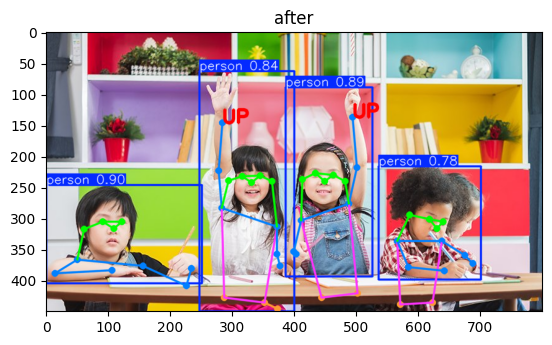

-1

In [3]:

out=results[0].plot()
for result in results:
    # Access the keypoints from the result
    keypoints = result.keypoints
    if keypoints is not None:
        keypoints_array = keypoints.xyn.cpu().numpy()  # Convert keypoints to numpy array (normalized x, y)
        for person_keypoints in keypoints_array:  # Iterate through each person's keypoints
            nose_x, nose_y = person_keypoints[get_keypoint.NOSE][:2]  # Extract x, y for the nose
            left_wrist_x,left_wrist_y=person_keypoints[get_keypoint.LEFT_WRIST][:2]
            right_wrist_x,right_wrist_y=person_keypoints[get_keypoint.RIGHT_WRIST][:2]
            print(f"Nose coordinates: ({nose_x:.4f}, {nose_y:.4f})")  # Print normalized coordinates
            print(f"left_wrist coordinates: ({left_wrist_x:.4f}, {left_wrist_y:.4f})")
            print(f"right_wrist coordinates: ({right_wrist_x:.4f}, {right_wrist_y:.4f})")
            if left_wrist_y<=nose_y:
                left_wrist_x,left_wrist_y=int(left_wrist_x*image.shape[1]),int(left_wrist_y*image.shape[0])
                cv2.putText(out,"UP",(left_wrist_x,left_wrist_y), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 3, cv2.LINE_AA)
                print("up")
            if right_wrist_y<=nose_y:
                right_wrist_x,right_wrist_y=int(right_wrist_x*image.shape[1]),int(right_wrist_y*image.shape[0])
                cv2.putText(out,"UP",(right_wrist_x,right_wrist_y), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 3, cv2.LINE_AA)
                print("up")
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title("after")
plt.show()
cv2.waitKey(0)

In [ ]:
#https://github.com/ultralytics/ultralytics/issues/8226
#https://github.com/Alimustoofaa/YoloV8-Pose-Keypoint-Classification/tree/master